In [1]:
#必要なパッケージのインポート

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

from scipy.integrate import solve_ivp
import pandas as pd
from reservoirpy.observables import nrmse, rsquare

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

%time


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 8.11 µs


In [7]:
# 指標を計算し、サブプロットに表示するための関数
def calculate_and_display_metrics(ax, data, shift_hour):
    # プロットと指標の表示
    ax.plot(data['x'], data['y'])
    #ax.set_title(f'Phase shift hour: {shift_hour}\nCov Trace: {cov_matrix_trace:.2f}, Det: {cov_matrix_det:.2f}\n Mean Dist: {mean_distance:.2f}')
    ax.set_title(f'Phase shift hour: {shift_hour}', fontsize = 18)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)

In [8]:
dir_name_plot = f"plot"
os.makedirs(dir_name_plot, exist_ok=True)

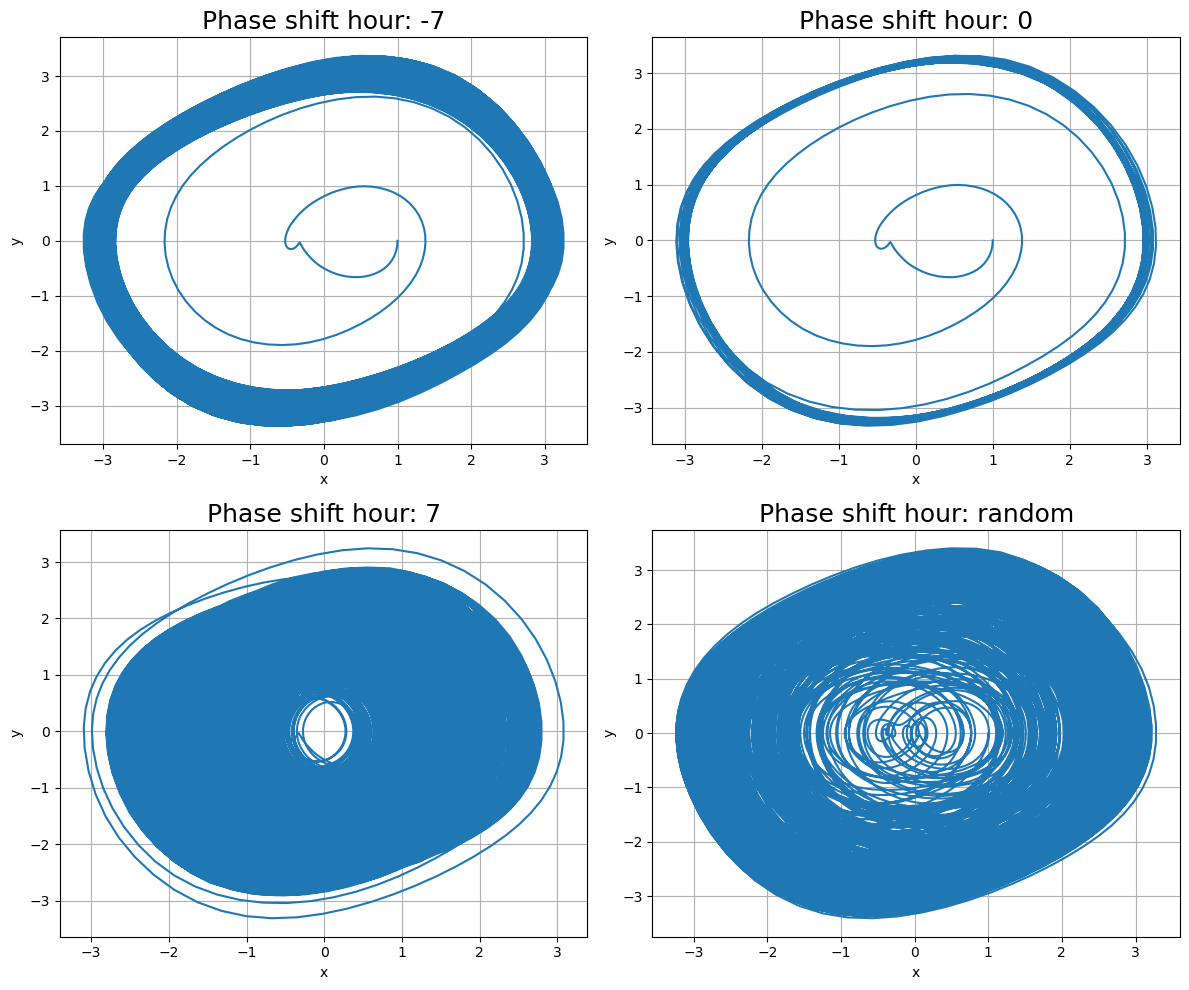

In [11]:
# 各shift_hourに対するフェーズプロットと指標の表示
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # サイズは必要に応じて調整してください

# ファイルを読み込む
shift_hour = -7
file_path = f'/Users/manqueenmannequin/b4thesis_upload/determinitstic/generate_data/data/VDP_{shift_hour}.csv'

data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[0, 0], data, shift_hour)
    
# ファイルを読み込む
shift_hour = 0
file_path = f'/Users/manqueenmannequin/b4thesis_upload/determinitstic/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[0, 1], data, shift_hour)

# ファイルを読み込む
shift_hour = 7
file_path = f'/Users/manqueenmannequin/b4thesis_upload/determinitstic/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[1, 0], data, shift_hour)
    
# ファイルを読み込む
file_path = '/Users/manqueenmannequin/b4thesis_upload/random/generate_data/data/VDP_random.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[1, 1], data, 'random')

plt.tight_layout()

# PDFとして保存
plt.savefig(f'{dir_name_plot}/phase_map_partly.pdf')  # 出力先のパスを適宜変更してください

plt.show()


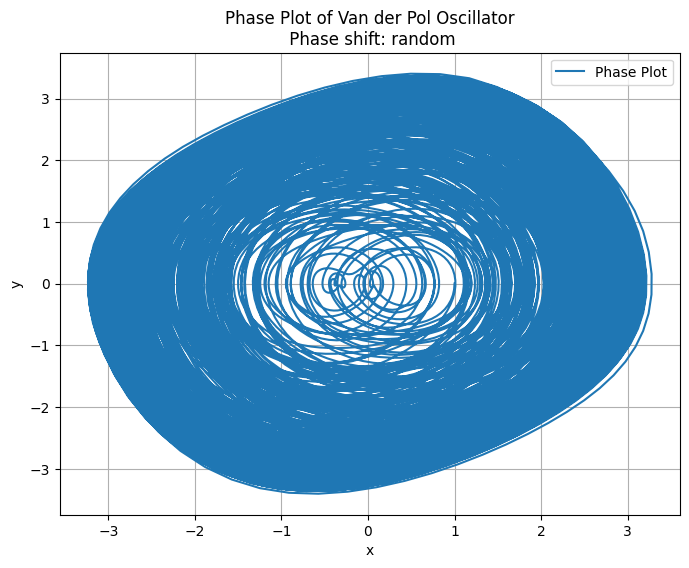

Area: 33.72191219352


In [91]:
import pandas as pd

# ファイルを読み込む
file_path = '/home/kuno/my_project/VDP/VDP_analysis/0random/generate_data/data/VDP_random.csv'
data = pd.read_csv(file_path)[:40000]

# データの最初のいくつかの行を表示して内容を確認
import matplotlib.pyplot as plt

# フェーズプロットの作成
plt.figure(figsize=(8, 6))
plt.plot(data['x'], data['y'], label='Phase Plot')
plt.title('Phase Plot of Van der Pol Oscillator\n Phase shift: random')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

from scipy.spatial import ConvexHull

# 曲線に囲まれた領域の面積の近似計算（多角形近似を使用）
points = np.column_stack((data['x'], data['y']))
hull = ConvexHull(points)
area = hull.volume  # ConvexHullのvolume属性は多角形の面積を表す

print(f'Area: {area}')



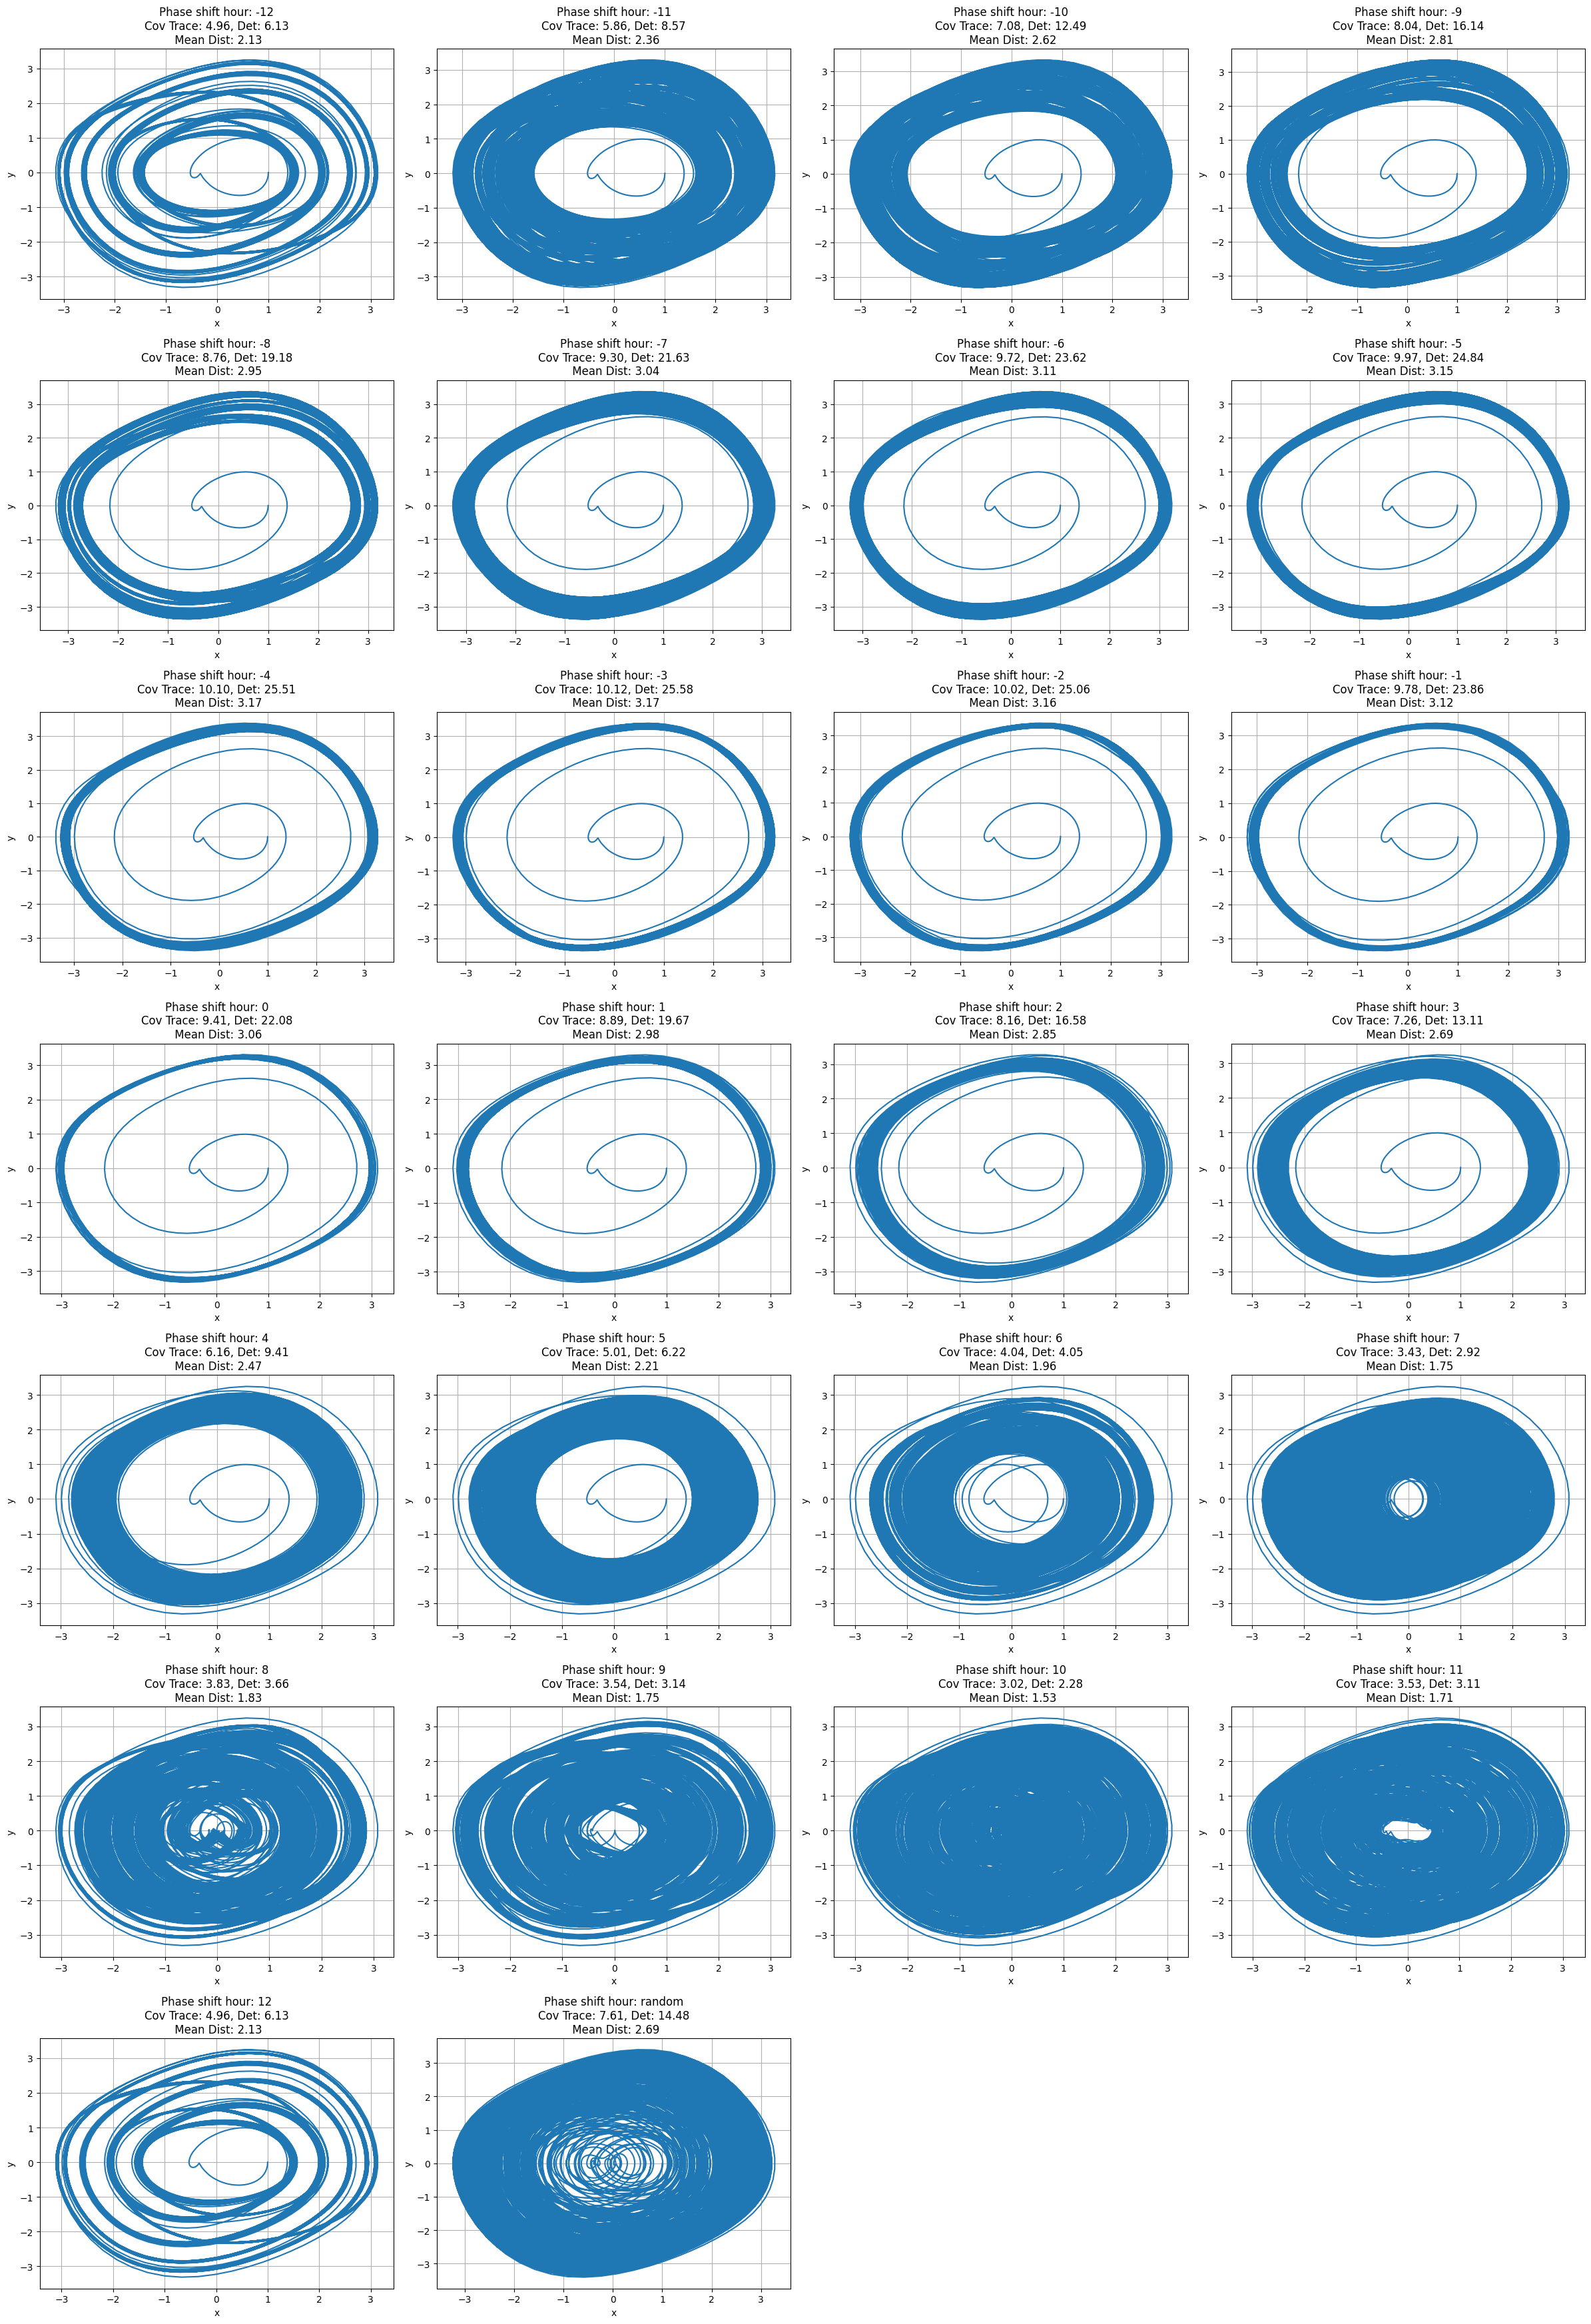

In [92]:
# 指標を計算し、サブプロットに表示するための関数
def calculate_and_display_metrics(ax, data, shift_hour):
    # 分散共分散行列とそのトレース、行列式
    cov_matrix = np.cov(data['x'], data['y'])
    cov_matrix_trace = np.trace(cov_matrix)
    cov_matrix_det = np.linalg.det(cov_matrix)

    # 面積の近似計算
    points = np.column_stack((data['x'], data['y']))
    hull = ConvexHull(points)
    area = hull.volume

    # 重心と重心からの平均距離
    centroid = np.mean(points, axis=0)
    mean_distance = np.mean(np.sqrt(np.sum((points - centroid) ** 2, axis=1)))

    # プロットと指標の表示
    ax.plot(data['x'], data['y'])
    ax.set_title(f'Phase shift hour: {shift_hour}\nCov Trace: {cov_matrix_trace:.2f}, Det: {cov_matrix_det:.2f}\n Mean Dist: {mean_distance:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)

# 各shift_hourに対するフェーズプロットと指標の表示
fig, axes = plt.subplots(7, 4, figsize=(24, 35))  # サイズは必要に応じて調整してください

for i, shift_hour in enumerate(range(-12, 13)):
    row = i // 4
    col = i % 4

    # ファイルを読み込む
    file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
    data = pd.read_csv(file_path)[:40000]

    # 指標の計算と表示
    calculate_and_display_metrics(axes[row, col], data, shift_hour)
    
# ファイルを読み込む
file_path = '/home/kuno/my_project/VDP/VDP_analysis/0random/generate_data/data/VDP_random.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[6, 1], data, 'random')

# 空のサブプロットを非表示にする
for i in range(26, 28):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

# PDFとして保存
plt.savefig('/home/kuno/my_project/VDP/VDP_analysis/entropy/plot/phase_map_all.pdf')  # 出力先のパスを適宜変更してください

plt.show()


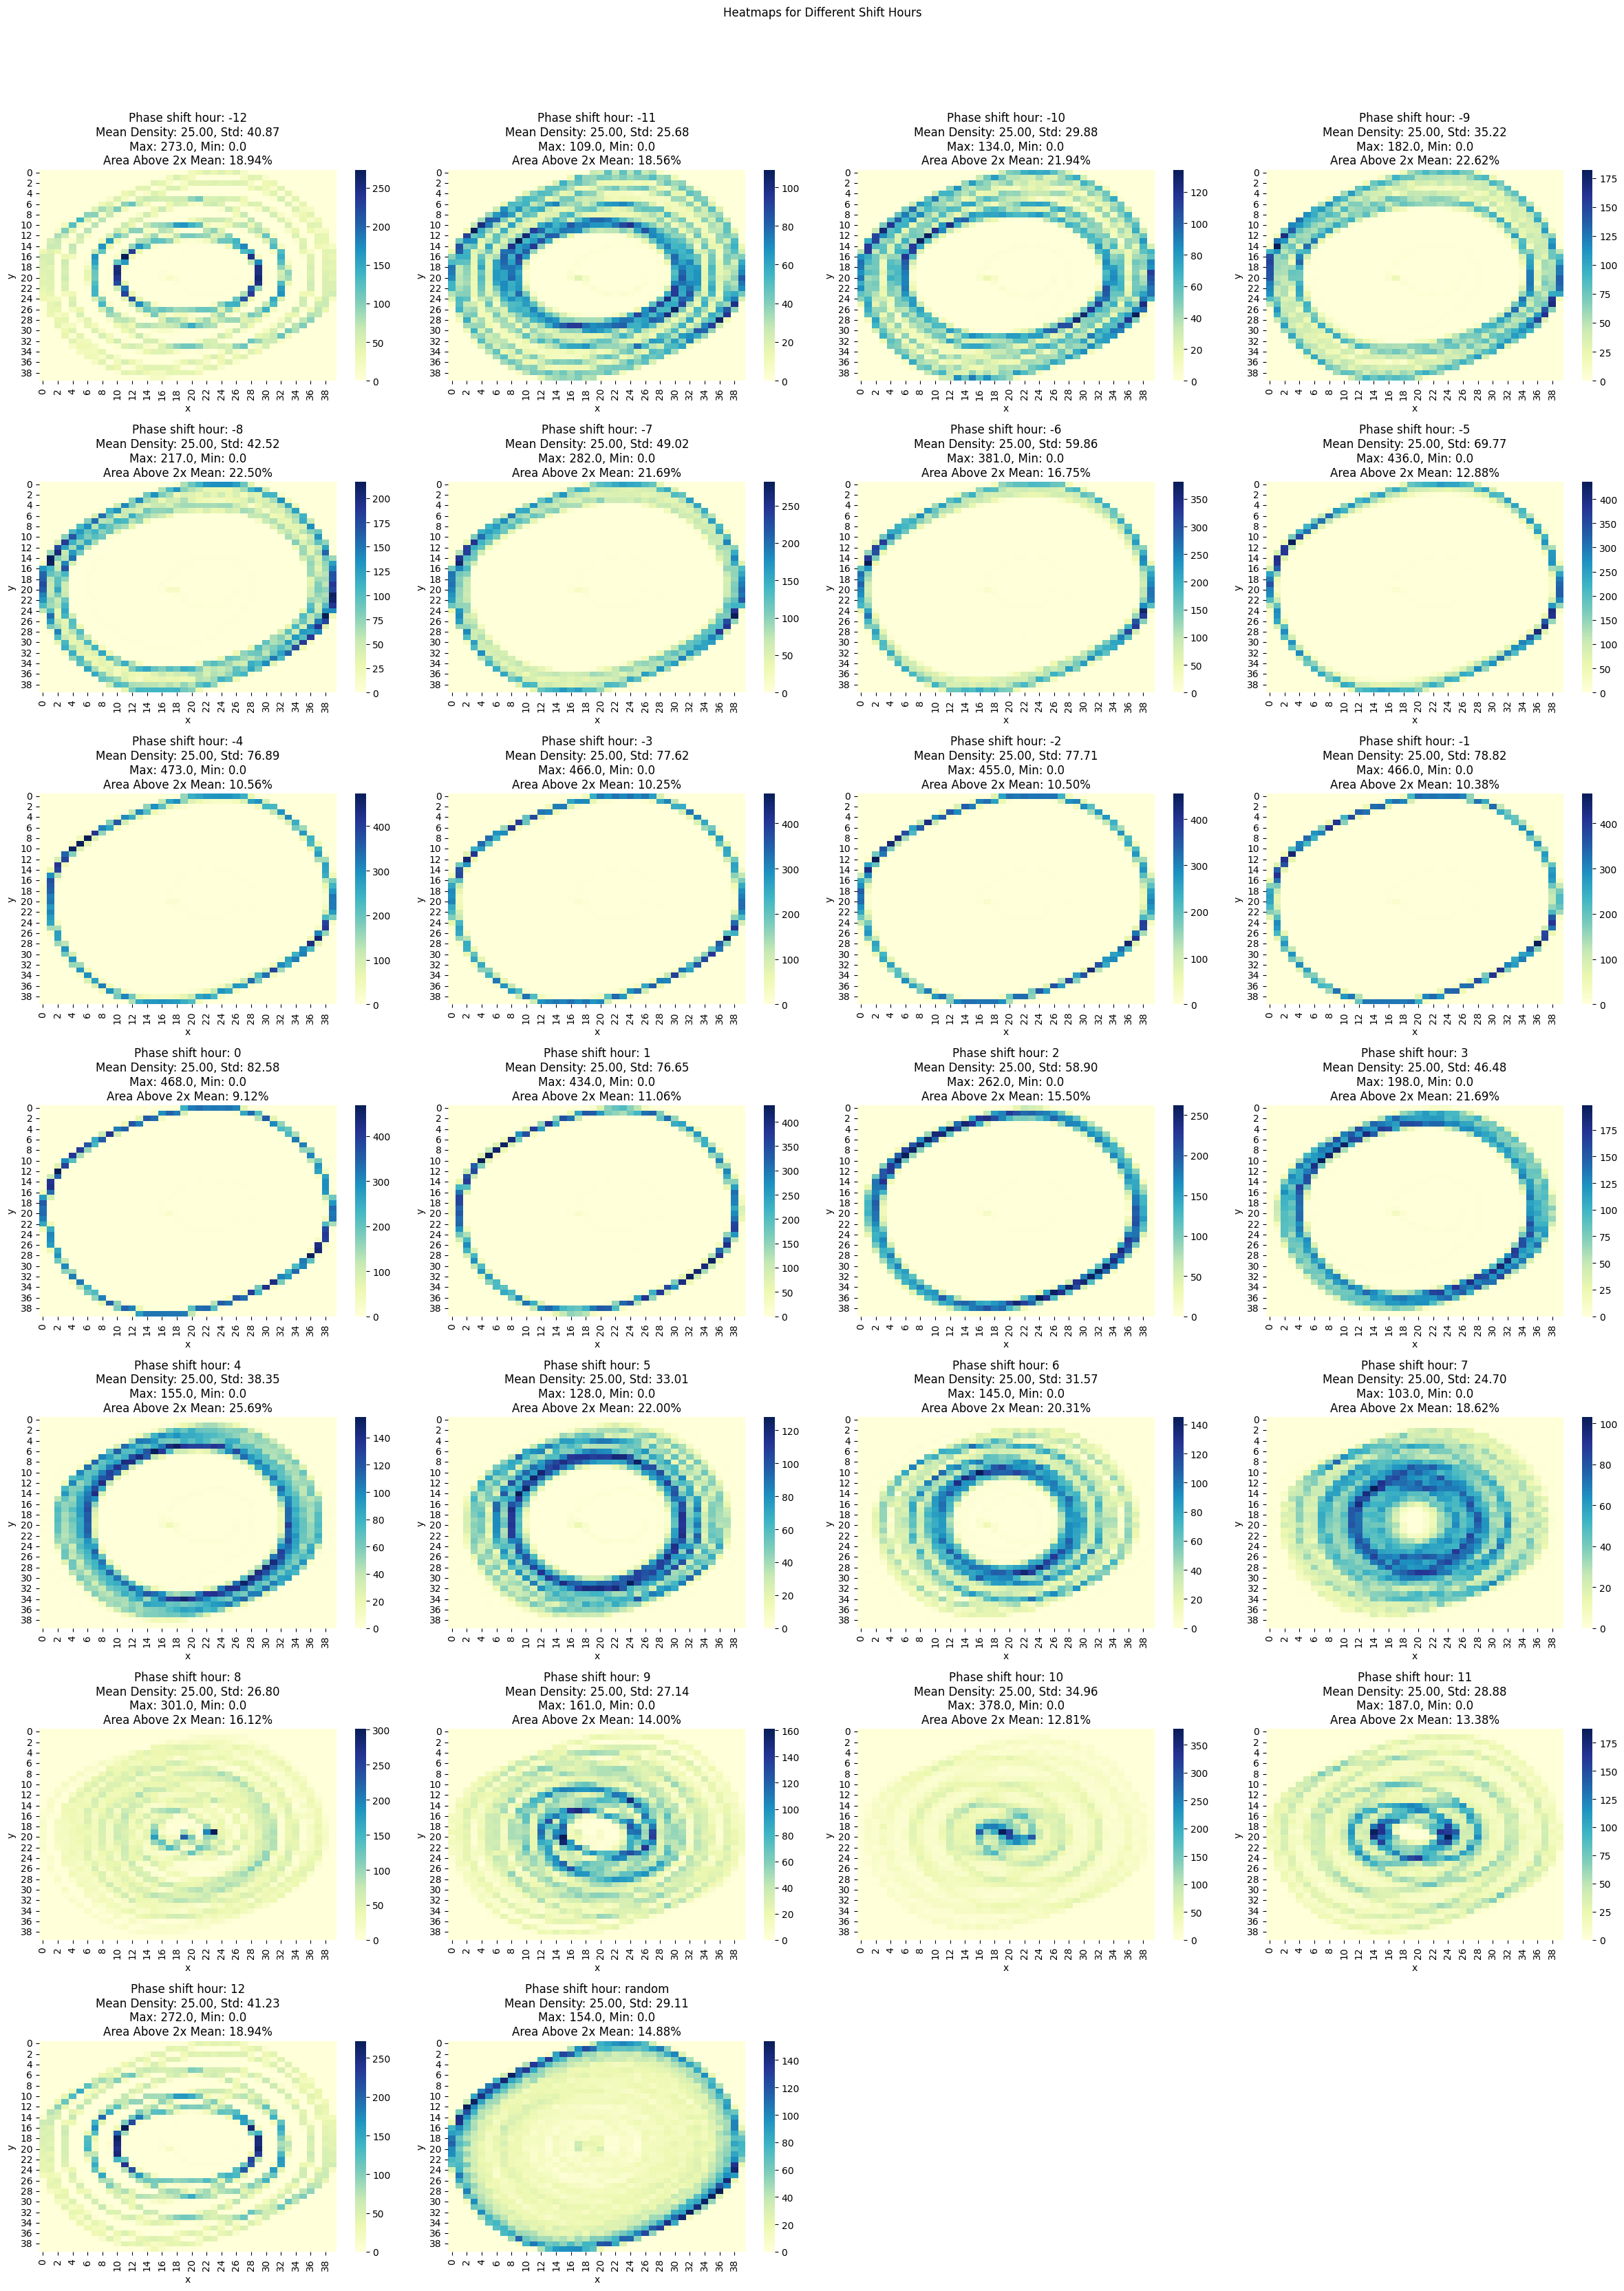

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def create_heatmap_subplot_with_metrics_fixed(ax, data, title, bins=40, threshold_factor=2):
    # Creating a 2D histogram (heatmap data) using x for x-axis and y for y-axis
    heatmap_data, xedges, yedges = np.histogram2d(data['x'], data['y'], bins=bins)

    # Transposing the heatmap data to swap x and y axes
    heatmap_data = heatmap_data.T

    # Reverse the order of the rows to adjust the y-axis direction
    heatmap_data = heatmap_data[::-1]

    # Calculating metrics
    mean_density = np.mean(heatmap_data)
    std_density = np.std(heatmap_data)
    max_density = np.max(heatmap_data)
    min_density = np.min(heatmap_data)

    # Threshold based area calculation
    threshold = mean_density * threshold_factor
    above_threshold_area = np.sum(heatmap_data > threshold) / heatmap_data.size

    # Updated title with metrics
    updated_title = (f'{title}\nMean Density: {mean_density:.2f}, Std: {std_density:.2f}\n'
                     f'Max: {max_density}, Min: {min_density}\n'
                     f'Area Above {threshold_factor}x Mean: {above_threshold_area:.2%}')

    # Plotting on the provided axes
    sns.heatmap(heatmap_data, cmap="YlGnBu", ax=ax)
    ax.set_title(updated_title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# 4x7 サブプロットを作成
fig, axes = plt.subplots(7, 4, figsize=(24, 35))  # サイズは必要に応じて調整してください

# shift_hour の範囲をループで回す
for i, shift_hour in enumerate(range(-12, 13)):
    # ファイルを読み込む
    file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
    data = pd.read_csv(file_path)[:40000]

    # データをデータフレームに変換
    sample_data = pd.DataFrame({'x': data['x'], 'y': data['y']})

    # サブプロットにヒートマップを作成
    row = i // 4  # 行
    col = i % 4  # 列
    create_heatmap_subplot_with_metrics_fixed(axes[row, col], sample_data, f"Phase shift hour: {shift_hour}")

    
# ファイルを読み込む
file_path = '/home/kuno/my_project/VDP/VDP_analysis/0random/generate_data/data/VDP_random.csv'
sample_data = pd.read_csv(file_path)[:40000]
create_heatmap_subplot_with_metrics_fixed(axes[6, 1], sample_data, f"Phase shift hour: random")

# 空のサブプロットを非表示にする
for i in range(26, 28):
    fig.delaxes(axes.flatten()[i])

# タイトルとレイアウトの調整
plt.suptitle("Heatmaps for Different Shift Hours")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # タイトルが切れないように調整

plt.savefig('/home/kuno/my_project/VDP/VDP_analysis/entropy/plot/heat_map_all.pdf')  # 出力先のパスを適宜変更してください

plt.show()


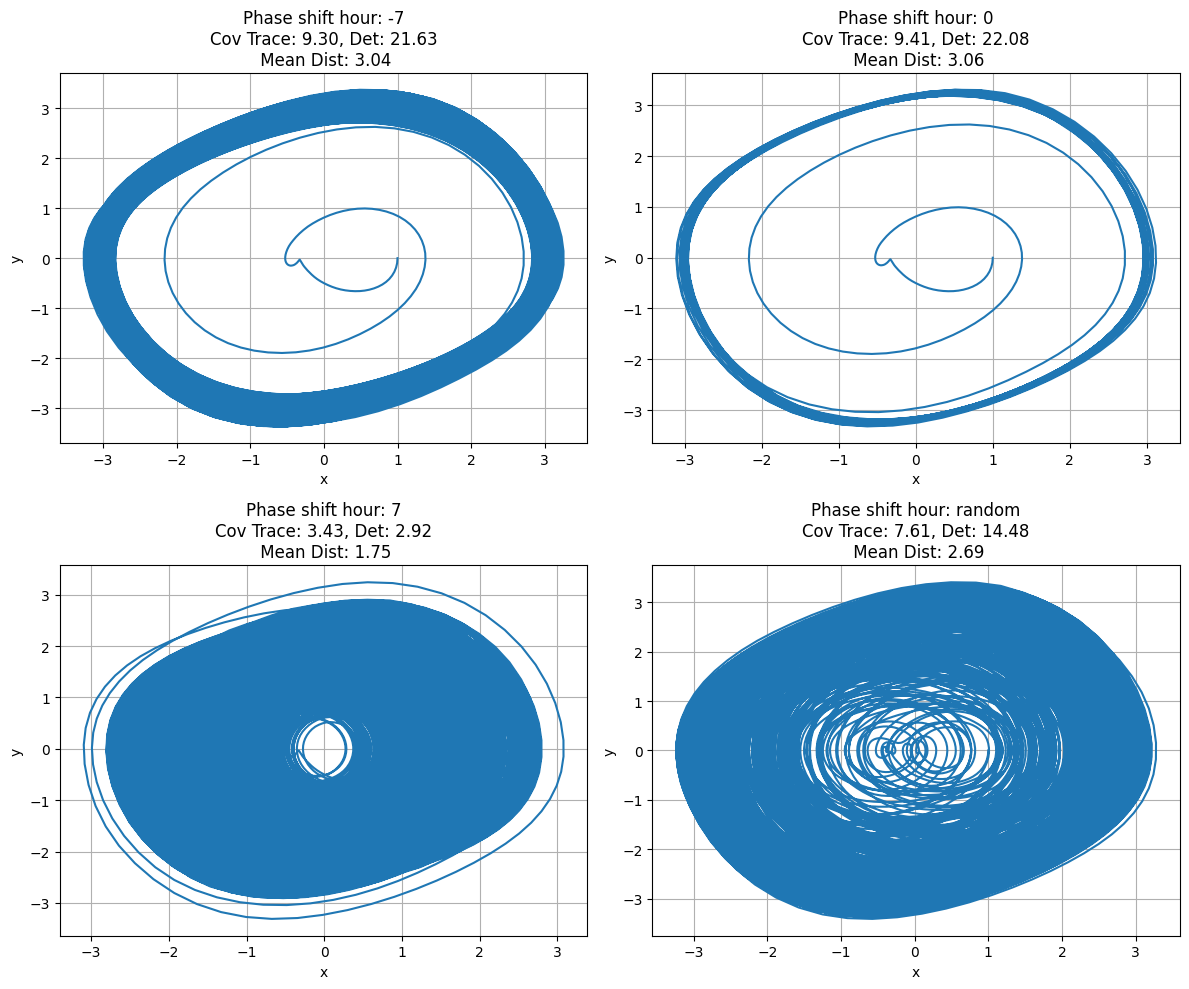

In [98]:
# 各shift_hourに対するフェーズプロットと指標の表示
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # サイズは必要に応じて調整してください

# ファイルを読み込む
shift_hour = -7
file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[0, 0], data, shift_hour)
    
# ファイルを読み込む
shift_hour = 0
file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[0, 1], data, shift_hour)

# ファイルを読み込む
shift_hour = 7
file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[1, 0], data, shift_hour)
    
# ファイルを読み込む
file_path = '/home/kuno/my_project/VDP/VDP_analysis/0random/generate_data/data/VDP_random.csv'
data = pd.read_csv(file_path)[:40000]
calculate_and_display_metrics(axes[1, 1], data, 'random')

plt.tight_layout()

# PDFとして保存
plt.savefig('/home/kuno/my_project/VDP/VDP_analysis/entropy/plot/phase_map.pdf')  # 出力先のパスを適宜変更してください

plt.show()


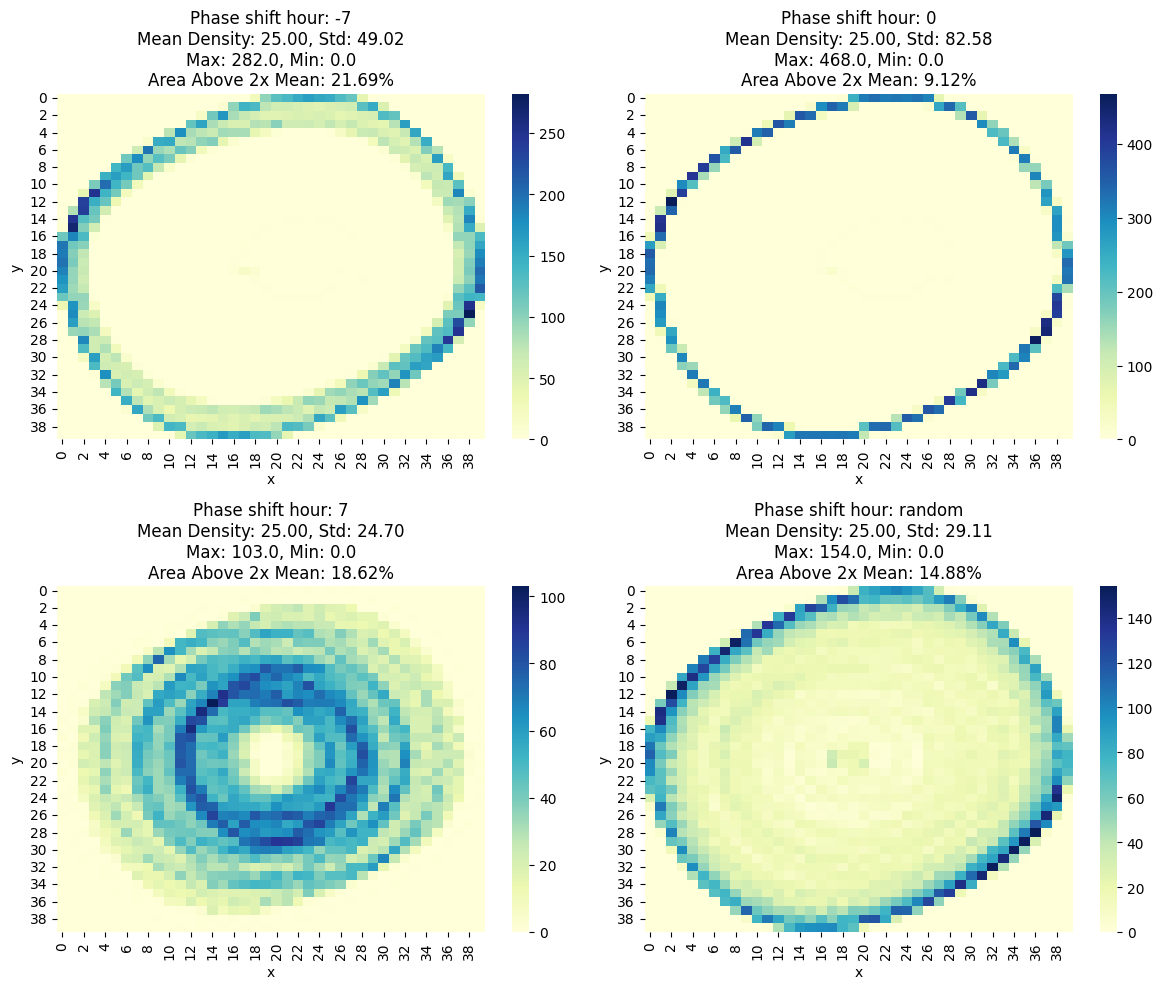

In [97]:
# 各shift_hourに対するフェーズプロットと指標の表示
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # サイズは必要に応じて調整してください

# ファイルを読み込む
shift_hour = -7
file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
create_heatmap_subplot_with_metrics_fixed(axes[0, 0], data, f'Phase shift hour: {shift_hour}')
    
# ファイルを読み込む
shift_hour = 0
file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
create_heatmap_subplot_with_metrics_fixed(axes[0, 1], data,  f'Phase shift hour: {shift_hour}')

# ファイルを読み込む
shift_hour = 7
file_path = f'/home/kuno/my_project/VDP/VDP_analysis/generate_data/data/VDP_{shift_hour}.csv'
data = pd.read_csv(file_path)[:40000]
create_heatmap_subplot_with_metrics_fixed(axes[1, 0], data,  f'Phase shift hour: {shift_hour}')
    
# ファイルを読み込む
file_path = '/home/kuno/my_project/VDP/VDP_analysis/0random/generate_data/data/VDP_random.csv'
data = pd.read_csv(file_path)[:40000]
create_heatmap_subplot_with_metrics_fixed(axes[1, 1], data,  f'Phase shift hour: random')

plt.tight_layout()

# PDFとして保存
plt.savefig('/home/kuno/my_project/VDP/VDP_analysis/entropy/plot/heat_map.pdf')  # 出力先のパスを適宜変更してください

plt.show()
